# Frequency Bands and Transmission Safety

This notebook will be focused on the advantages of using RFSoC for Radio and Software Defined Radio (SDR), as well as covering relevent frequency bands with respect to the RFSoC and common uses for such bands. Time will also be spent covering Nyquist zones and how these relate to the relavent frequency bands.

Additionally, this notebook will introduce transmission saftey - becoming aware of licensed and unlicensed frequency bands as well as environmental frequency concerns. 

## Introduction to the Radio Frequency (RF) band

### Radio Fundamentals

Radio systems convey information on a Radio Frequency (RF) band. A standard transmitter and receiver setup can be seen in the diagram below.

*transmitter receiver diagram*

Such a system works by modulating a low frequency baseband signal to a desired RF frequency at the transmitter side and by demodulating from the RF frequency back to the baseband signal at the receiver. 

*modulation diagram*

More information on modulation and demodulation can be found at this [notebook](./Modulation_Demodulation.ipynb).

### RF in Daily Life

Wireless communications via RF is now an essential part of life for many people. Whether it is wireless network access in offices, mobile basestation backhaul, consumers texting, using voice and video communications or social media, it is likely at some point that they will be communicating over various frequency bands using standards such as Bluetooth, WiFi, GSM, and LTE. Planning and licensing is required in order to set rules about power levels, and ensure that interference does not occur between different broadcasters. In the UK, these frequency planning and licensing tasks fall upon a government approved body called the Office of Communications (Ofcom - https://www.ofcom.org.uk/home). The USA has the Federal Communications Commission (FCC - https://www.fcc.gov/); and other countries have their own national agencies. In all countries the RF Spectrum has been split up into a number of defined frequency bands which are allocated to different users and for different application. Generally no two countries are exactly the same in their frequency planning, and there can be considerable differences.

To give an example, in the UK there are currently no mobile phone service frequencies below 800 MHz, whereas in some countries in Eastern Europe, they operate down as low as the 400 MHz UHF band. In recent years there have been efforts via organisations such as the International Telecommunications Union (ITU - https://www.itu.int) to harmonise these bands where possible (particularly in areas where countries have borders). 

An example of successful harmonisation is WiFi (the IEEE 802.11 standard) which operates on the 2.4 GHz band. FM radio is also pretty standard across most countries, in the 88 MHz to 108 MHz band, and nearly all radio stations are spaced at least 200 KHz apart. When frequenies are harmonised, equipment designed to work in one country will likely work in others; which helps bring costs down. 

Communications techniques where harmonisation is not as prevalent include mobile standards, with, for example, the USA and Europe using quite distinct frequencies for GSM, UMTS and LTE services. Modern phones are now able to address issues like this adequetly however, by being tri- (or even quad-) band, and having the ability to receive and transmit at various frequencies using different front end RF hardware, which can be switched in and out depending on which country it is being used in.

5G will see new allocated frequency bands around the world and in particular the wider use of mm-wave frequencies  (26 GHz and higher). Used frequencies will go well above 32 GHz to 80 GHz and higher.

### Nyquist Zones

**Nyquist Sampling Rate**

If a baseband, bandlimited signal is composed of sine waves up to a frequency $f_{b}$ Hz, then the Nyquist Frequency is 

$$ f_{n} = 2f_{b}$$

If we require to sample this signal and retain all information, then the sampling rate, $f_{s}$, must be chosen as:

$$f_{s} > f_{n} = f_{s} > 2f_{b}$$

This frequency is often referred to as the Nyquist sampling rate, (distinct from the Nyquist frequency!).

**Aliasing**

When a (baseband) signal is sampled at a frequency *below* the Nyquist rate, then we "lose" the signal frequency information and **aliasing** is said to have occurred. Aliasing can be illustrated by sampling a sine wave at below the Nyquist rate and then "reconstructing". We note that it appears as a sine wave of *lower* frequency.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *

fs = 1000 # sample rate 
n_window = fs # fft size

In [38]:
samples = np.arange(fs) # the points on the x axis for plotting - 0 to fs
t = samples/fs #samples per sampling rate - amount of time passed to process number of samples - array

freqs = np.fft.fftshift(np.fft.fftfreq(n_window,1/fs)) #frequency domain axis for graphs

Here we define three signals, each composed of 3 sine waves:

$$w(t) = 100\sin(2 \pi 100 t) + 50\sin(2 \pi 250 t) + 25\sin(2 \pi 400 t)$$

$$x(t) = 100\sin(2 \pi 900 t) + 50\sin(2 \pi 750 t) + 25\sin(2 \pi 600 t)$$

$$y(t) = 100\sin(2 \pi 1100 t) + 50\sin(2 \pi 1250 t) + 25\sin(2 \pi 1400 t)$$

In [50]:
w = 100*np.sin(2*np.pi*100*t) + 50*np.sin(2*np.pi*250*t) + 25*np.sin(2*np.pi*400*t)
x = 100*np.sin(2*np.pi*900*t) + 50*np.sin(2*np.pi*750*t) + 25*np.sin(2*np.pi*600*t)
y = 100*np.sin(2*np.pi*1100*t) + 50*np.sin(2*np.pi*1250*t) + 25*np.sin(2*np.pi*1400*t)

In [51]:
w_fft_db = find_fft(w, n_window)
x_fft_db = find_fft(x, n_window)
y_fft_db = find_fft(y, n_window)

By plotting the FFTs of these signals sampled at 1000 Hz we can see the effects of aliasing - all three signals have been aliased, to 100, 250 and 400 Hz components respectively. Clearly if a signal has frequency components greater than $\frac{f_{s}}{2}$ then aliasing will occur, manifesting as a distortion of a signal. 

From a knowledge of $f_{s}$ and the input frequencies it is straightforward to establish the frequency of the aliased components for any given components above $\frac{f_{s}}{2}$.

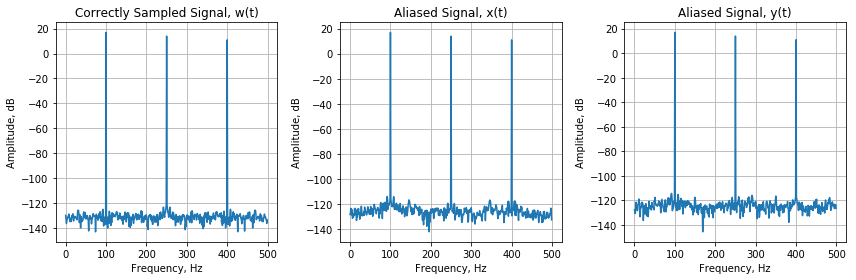

In [54]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
size = np.arange(1,11)
axes[0].plot(freqs[int(fs/2):], w_fft_db[int(fs/2):])
axes[0].grid(True)
axes[0].set_title("Correctly Sampled Signal, w(t)")
axes[0].set_xlabel('Frequency, Hz')
axes[0].set_ylabel('Amplitude, dB')
axes[1].plot(freqs[int(fs/2):], x_fft_db[int(fs/2):])
axes[1].grid(True)
axes[1].set_title("Aliased Signal, x(t)")
axes[1].set_xlabel('Frequency, Hz')
axes[1].set_ylabel('Amplitude, dB')
axes[2].plot(freqs[int(fs/2):], y_fft_db[int(fs/2):])
axes[2].grid(True)
axes[2].set_title("Aliased Signal, y(t)")
axes[2].set_xlabel('Frequency, Hz')
axes[2].set_ylabel('Amplitude, dB')
fig.tight_layout()
plt.show()

In our example, we sampled three signals each at 1000 Hz. If we sample a sum of a few sine waves, *w(t)* at 1000 Hz we adhere to the Nyquist criteria. We can represent the signal to be sampled as a simple (sine wave amplitude) spectrum:

*diagram of w(t)*

Of course, if we had sampled the signal *x(t)* (i.e. sine waves at 900 Hz, 750 Hz and 600 Hz) at 1000 Hz, then because the Nyquist criteria is not met, all of these sine waves will alias respectively to 100, 250 and 400 Hz components.

*diagram of x(t)*

Similarly if we sampled the signal *y(t)* (i.e. sine waves at 1100 Hz, 1250 Hz and 1400 Hz) at 1000 Hz, then as the Nyquiest criteria is not met, all of these sine waves will alias respectively to 100, 250 and 400 Hz components. 

*diagram of y(t)*

We can then note a pattern of spectrum aliasing as shown below:

*spectrum pattern diagram*

If you are viewing the output signal only, after sampling then after suitable reconstruction you cannot be sure what the input signal was as aliasing may have occured. Clearly the above system sampling at 1000 Hz would be best limited to only have input signals with frequencies below 500 Hz. However, **aliasing can be exploited**, such as in situations where we wish to demodulate a signal. If this signal is appropriately bandlimited, the output signal will alias to the same "shape" at baseband frequencies. This general process is called undersampling, and is applicable in software defined radio systems for the direct demodulation of received signals. 

**Nyquist Zones**

Noting the 'folding' of signal spectra that was observed in the previous example, around integer multiples of $\frac{f_{s}}{2}$, we can define these regions of the frequency spectrum as **Nyquist Zones**.

For example, if the signal was sampled at $f_{s}$, any signal components present at a 'red' frequency shown in the diagram would alias down to the corresponding position in the baseband region.

*nyquist zone diagram*

An analogue lowpass filter is needed to retain the frequencies in Nyquist Zone 1, and attentuate any components at higher frequencies that would otherwise alias into this region. Similarly, if we wanted to exploit alaising from a higher Nyquist Zone, a suitable analogue bandpass filter would be required, to ensure that only the desired signal components alias into Nyquist Zone 1. 

For example, suppose that the signal of interest resides entirely in Nyquist Zone 5, and that unwanted signal components exist in Bands 4 and 6. To avoid the unwanted signal components also being aliased to the baseband region, and being superimposed onto the desired signal, a bandpass filter must be applied around Nyquist Zone 5 prior to sampling.

*Nyquist zone example - show or link to a notebook*

### The RF Spectrum

Useable radio frequencies for communications start at the low kHz, with AM radio appearing around 600 kHz to 1800 kHz. FM radio, then appears from around 88 MHz, and the useable RF communication spectrum is all of the way to 10's of GHz (so called mm waves noting the wavelength is indeed of millimetres in length).

*overview of full spectrum diagram*

With modern ADCs capable of sampling at multiple GHz, the RF frequencies of many wireless bands can be directly digitised. For example, with 4 GHz sampling, signals in the 1st Nyquist Zone (i.e. 0 to 2 GHz) can be digitised in the conventional manner. With the RFSoC, signals in the 2nd Nyquist Zone can also be captured by exploiting aliasing, provided that an appropriate bandpass filter first removes any components present at other frequencies. Indeed, the 3rd Nyquist Zone and higher can also be used in the same way - provided that suitable analogue filtering is applied.

Sampling signals in the **1st Nyquist Zone** (0 to 2 GHz) allows several common signal types to be captured, including: 

- GNSS navigation systems (several bands from 1.164 GHz to 1.610 GHz)


- Broadcast television (~470 to 700 MHz)


- IoT standards LoRa (867 - 869 MHz, 902 - 928 MHz) and NB-IoT (bands include 800 MHz and 1.8 GHz)


- Several cellular bands (e.g. 800 MHz, 900 MHz, 1.4 GHz, 1.8 GHz in the UK)


*Nyquist Zone 1 diagram*

Extending to the **2nd Nyquist Zone** (2 GHz to 4 GHz), additional signal types can also be received, such as:

- 2.4 GHz WiFi band (2.4 to 2.5 GHz)


- Bluetooth (2.45 GHz)


- Citizens Broadband Radio Service (CBRS) in the USA (3.55 GHz to 3.7 GHz)


- Cellular bands (2.1 GHz, 2.3 GHz, 2.6 GHz)


The **3rd Nyquist Zone** would bring further possibilties including:

- 5GHz WiFi band (5.15 to 5.725 GHz)


*Nyquist Zone 2+3 diagram*

Usually, larger bandwidths are available in higher frequency bands, and therefore high data rate services favour high RF frequencies. This is balanced against the disadvantage of increased path loss at higher frequencies. Therefore, there is a move towards three different bands for 5G, each catering to a different point in the trade-off between range (coverage) and available data rate.

It is worth noting that RF frequencies used by many of these systems (e.g. television, cellular) vary internationally.

## Safe Transmission Bands

The frequency spectrum can be thought of as divided into three sections - the licensed spectrum, shared spectrum and license-exempt spectrum. It is of the utmost importance that a user is mindful of which band they fall into and especially that an unlicensed user transmits safely within the registered license-exempt spectrum.

*Spectrum Sharing Diagram*

### Licensed Spectrum

The frequency spectrum is limited to a finite number of frequencies. If there are too many transmissions on any band at the same time, it would become impossible to successfully receive any signals due to interference. Therefore, government agencies, (Ofcom in the UK, FCC in the USA), are tasked with licensing the spectrum to specific users so that it is efficiently used. The majority of the spectrum is licensed to users such as television and radio broadcasters. Companies pay a licensing fee for the right to transmit on an assigned frequency within a certain area, ensuring nothing will interfere with their transmission.

[Radio Licenses](https://www.ofcom.org.uk/manage-your-licence/radiocommunication-licences) include:

- **Amateur radio**


- **Business radio**


- **Ship radio**


- **TV White Space Devices (WSD)**


- **Aeronautical radio**


- **Fixed terrestial links**


- **Fixed Wireless Access** (5725 to 5850 MHz)


- **The Internet of Things (IoT)**


- **Maritime radio**


- **Mobile and wireless broadband**


- **Local access**


- **Shared access**


- **Extremely High Frequency (EHF) access**


- **Inovation licensing**


- **Offshore mobile**


- **Programme-making and special events (PMSE)**


- **Satellite earth stations and GNSS repeaters**


- **Short Range Devices (SRDs)**

### Shared Spectrum

### License-Exempt Spectrum

In the unlicensed spectrum users are not dependent on any operator. This is a clear benefit over the protected licensed spectrum, however this free-for-all nature introduces a major issue - interference. Usage is uncoordinated, with no regulatory restrictions other than in transmission power. There are three main ways to reduce the interference between adjacent users:

- **Reducing transmitter power**: low power radio waves will die before colliding with adjacent users.


- **Use higher frequency bands**: RF waves at higher frequencies will die much faster compared to those at lower frequency bands. 


- **Utalise frequency hopping**: transmitting equipment fitting with the ability to choose a specific block of spectrum which is relatively interference free.


The UK Office of Communications, Ofcom, excempts radio stations, equipment or apparantus from the need to hold a wireless telegraphy license where their use is not likely to involve any undue interference to other legitimate users of the radio spectrum. These [license-exempt devices](https://www.ofcom.org.uk/spectrum/radio-spectrum-and-the-law/licence-exempt-radio-use/licence-exempt-devices) include:

- **Vehicle radar** (24 GHz, 79 GHz): radar devices which enable automous features in modern vehicles such as parking sensors and adaptive cruise control. 


- **Citizens Band (CB) Radio** (27 MHz): short range radio service for both hobby and business use. Designed for use without qualification and without causing interference.


- **Cordless telephony** (900 to 928 MHz): low power radio link between handset and basestation.


- **High Density Fixed Satellite Applications (HDFSS)** (27.5 to 27.8185 GHz, 28.4545 to 28.8265 GHz and 29.4625 to 30 GHz): satellite technology designed to provide broadband internet and multi-media access.


- **Model control** (458.5 to 459.5 MHz, 2.4 GHz): remote control of model vehicles over land, sea or air e.g. drones 


- **Private Mobile Radio (PMR446)** (446 MHz): mobile, short-range, peer-to-peer voice and/or data communication system e.g. a 'walkie-talkie' handset.


- **Radar level gauges** (6 to 11 GHz, 24 to 29 GHz, 75 to 85 GHz): distance measuring devices using emitted microwaves 


- **Ultra Wideband (UWB)**: very low power radiation spread over a very large RF badwidth (greater than 50 MHz). 


- **Short Range Devices (SRDs)**: devices designed to operate over short range and low power levels, including alarms, telemetry and telecommand devices, radio microphones, radio local area networks and anti-theft devices with maximum powers up to 500 mW. For full details, see the [SDR Information Sheet](https://www.ofcom.org.uk/cymru/spectrum/radio-spectrum-and-the-law/licence-exempt-radio-use/licence-exempt-devices/short-range-devices-information).


- **White Space Devices (WSDs)**: White spaces are parts of the spectrum unused at a particular location or time e.g. TV white spaces (470 MHz to 790 MHz). WSDs utalise a database to work out which frequencies and powers they can safely communicate from.

## Environment Safety

University Of Strathclyde &copy;